# Attention

This test `MUST` not be run before the compression tests, because it uses the files generated there to work.

In [1]:
import time
import subprocess as subp
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
text_samples = [
    ("dna", ["dna.50MB", "dna.100MB", "dna.200MB"]),
    ("english", ["english.50MB", "english.100MB", "english.200MB"]),
    ("sources", ["sources.50MB", "sources.100MB", "sources.200MB"])
]

In [5]:
data = {}

for (topic, text_file_list) in text_samples:

    y_time_zip = []
    y_time_ipmt = []

    for text_file in text_file_list:

        text_file = "./test-assets/compressed-assets/" + text_file

        zipped_file_name = text_file + ".zip"
        ipmt_compressed_file_name = text_file + ".myz"

        t1 = time.time()
        subp.check_call(["unzip", "-o", zipped_file_name])
        t2 = time.time()
        y_time_zip.append(t2 - t1)

        t1 = time.time()
        subp.check_call(["ipmt", "unzip", ipmt_compressed_file_name])
        t2 = time.time()
        y_time_ipmt.append(t2 - t1)
    
    data[topic] = {
        "y_time_zip"    : y_time_zip,
        "y_time_ipmt"   : y_time_ipmt
    }

Archive:  ./test-assets/compressed-assets/dna.50MB.zip
  inflating: test-assets/dna.50MB    
Archive:  ./test-assets/compressed-assets/dna.100MB.zip
  inflating: test-assets/dna.100MB   
Archive:  ./test-assets/compressed-assets/dna.200MB.zip
  inflating: test-assets/dna.200MB   
Archive:  ./test-assets/compressed-assets/english.50MB.zip
  inflating: test-assets/english.50MB  
Archive:  ./test-assets/compressed-assets/english.100MB.zip
  inflating: test-assets/english.100MB  
Archive:  ./test-assets/compressed-assets/english.200MB.zip
  inflating: test-assets/english.200MB  
Archive:  ./test-assets/compressed-assets/sources.50MB.zip
  inflating: test-assets/sources.50MB  
Archive:  ./test-assets/compressed-assets/sources.100MB.zip
  inflating: test-assets/sources.100MB  
Archive:  ./test-assets/compressed-assets/sources.200MB.zip
  inflating: test-assets/sources.200MB  


In [6]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

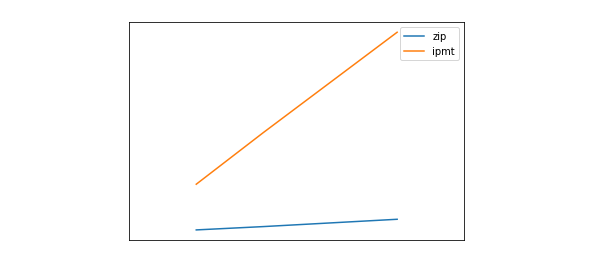

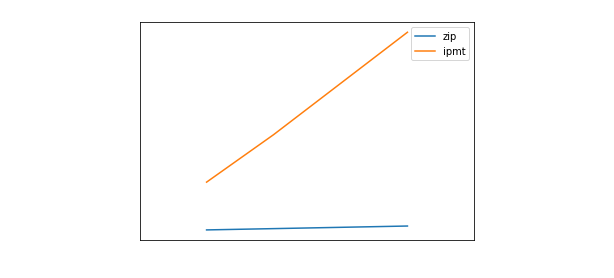

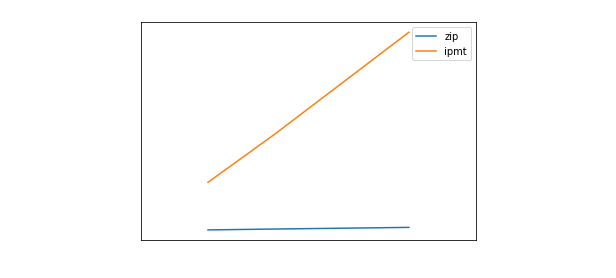

In [7]:
for topic_key in data:
    topic_data = data[topic_key]

    y_time_zip = topic_data["y_time_zip"]
    y_time_ipmt = topic_data["y_time_ipmt"]

    # plot - Time efficiency
    fig, ax = plt.subplots()
    
    x = [50, 100, 200]

    ax.plot(x, y_time_zip, label='zip')
    ax.plot(x, y_time_ipmt, label='ipmt')

    ax.set(xlim=(0, 250), xticks=np.arange(50, 250, 50))

    plt.title(f"Eficiência de tempo de ferramentas de descompressão de acordo com o tamanho do texto: {topic_key}")
    plt.xlabel("Tamanho do arquivo em MBs")
    plt.ylabel("Tempo de descompressão")

    plt.legend(labelcolor='black', loc='best')
    plt.show()